In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/ITC_day_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/DABUR_60_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/RADICO_5_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/UBL_10_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/EMAMILTD_30_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/RADICO_30_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/BRITANNIA_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/GODREJCP_10_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/MARICO_5_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/EMAMILTD_10_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/VBL_minute_data.csv
/kaggle/input/nifty-fmcg-data-1-minute-5-minute-daily-data/NESTLEIND_5_minute_da

In [3]:
df = pd.read_excel('/kaggle/input/all-company-data/FMCG IND.xlsx')
df

,date,close,high,low,open,volume
0,2015-01-01 00:00:00+05:30,915.75,931.50,911.62,919.27,48475
1,2015-01-02 00:00:00+05:30,939.27,942.50,919.00,921.00,154493
2,2015-01-05 00:00:00+05:30,939.92,963.47,936.15,944.50,172236
3,2015-01-06 00:00:00+05:30,940.95,955.00,925.00,942.50,114142
4,2015-01-07 00:00:00+05:30,997.87,1004.45,945.97,945.97,473737
...,...,...,...,...,...,...
1911,2022-10-31 00:00:00+05:30,3766.55,3800.00,3739.35,3788.00,198318
1912,2022-11-01 00:00:00+05:30,3788.00,3808.60,3755.05,3780.00,338873
1913,2022-11-02 00:00:00+05:30,3723.95,3794.40,3714.30,3788.00,185469
1914,2022-11-03 00:00:00+05:30,3748.05,3760.55,3705.45,3707.00,140994


In [4]:
df.head()

,date,close,high,low,open,volume
0,2015-01-01 00:00:00+05:30,915.75,931.50,911.62,919.27,48475
1,2015-01-02 00:00:00+05:30,939.27,942.50,919.00,921.00,154493
2,2015-01-05 00:00:00+05:30,939.92,963.47,936.15,944.50,172236
3,2015-01-06 00:00:00+05:30,940.95,955.00,925.00,942.50,114142
4,2015-01-07 00:00:00+05:30,997.87,1004.45,945.97,945.97,473737


**Data Merge**

In [5]:
# Define the path to your Excel file
file_path = '/kaggle/input/all-company-data/FMCG IND.xlsx'

# List of specific sheet names to merge
sheet_names = ["Britania", "COLPAL", "Dabur", "EMAMI", "GODREJ", "HINDULV", "ITC", "MCDOWELL", "Marico", "Nestle", "PGHH", "Radico", "TATA", "UBL", "VBL"]

# Initialize an empty list to store each DataFrame
dfs = []

# Iterate through the list of sheet names
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df['SheetName'] = sheet_name  # Optionally, add a column to identify the sheet
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the merged DataFrame
print(merged_df)


                            date    close     high      low     open   volume  \
0      2015-01-01 00:00:00+05:30   915.75   931.50   911.62   919.27    48475   
1      2015-01-02 00:00:00+05:30   939.27   942.50   919.00   921.00   154493   
2      2015-01-05 00:00:00+05:30   939.92   963.47   936.15   944.50   172236   
3      2015-01-06 00:00:00+05:30   940.95   955.00   925.00   942.50   114142   
4      2015-01-07 00:00:00+05:30   997.87  1004.45   945.97   945.97   473737   
...                          ...      ...      ...      ...      ...      ...   
28278  2022-10-31 00:00:00+05:30  1049.05  1055.00  1032.10  1046.85  1353114   
28279  2022-11-01 00:00:00+05:30  1107.00  1114.00  1052.40  1060.00  5044191   
28280  2022-11-02 00:00:00+05:30  1127.50  1165.00  1110.00  1110.00  3572759   
28281  2022-11-03 00:00:00+05:30  1189.00  1233.00  1128.35  1130.00  6077712   
28282  2022-11-04 00:00:00+05:30  1138.90  1220.00  1132.00  1194.80  2999929   

      SheetName  
0      Br

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [7]:
# Ignore warnings for clean output
warnings.filterwarnings("ignore")

In [8]:
# Load the Excel file
file_path = '/kaggle/input/all-company-data/FMCG IND.xlsx'
xl = pd.ExcelFile(file_path)

In [9]:
# List of company sheets
companies = ["Britania", "COLPAL", "Dabur", "EMAMI", "GODREJ", "HINDULV", "ITC", "MCDOWELL", "Marico", "Nestle", "PGHH", "Radico", "TATA", "UBL", "VBL"]

In [10]:
# Function to fit ARIMA model and predict next n days
def predict_arima(data, n_periods):
    model = ARIMA(data, order=(5, 1, 0))  # Adjust the order as necessary
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=n_periods)
    return forecast

In [12]:
# Predict and plot for each company
n_periods = 30  # Number of days to predict

In [13]:
for company in companies:
    # Read the sheet into a DataFrame
    df = xl.parse(company)
    
    # Ensure the 'date' column is a datetime type and set it as the index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

In [14]:
# Predict the next n_periods for the closing prices
forecast = predict_arima(df['close'], n_periods)
print(forecast)

1460    1131.104017
1461    1126.760713
1462    1129.584916
1463    1131.618248
1464    1132.397416
1465    1132.243309
1466    1131.970014
1467    1131.830313
1468    1131.820041
1469    1131.850177
1470    1131.872062
1471    1131.877502
1472    1131.875042
1473    1131.872034
1474    1131.870822
1475    1131.870875
1476    1131.871234
1477    1131.871443
1478    1131.871478
1479    1131.871443
1480    1131.871412
1481    1131.871402
1482    1131.871404
1483    1131.871408
1484    1131.871410
1485    1131.871410
1486    1131.871409
1487    1131.871409
1488    1131.871409
1489    1131.871409
Name: predicted_mean, dtype: float64


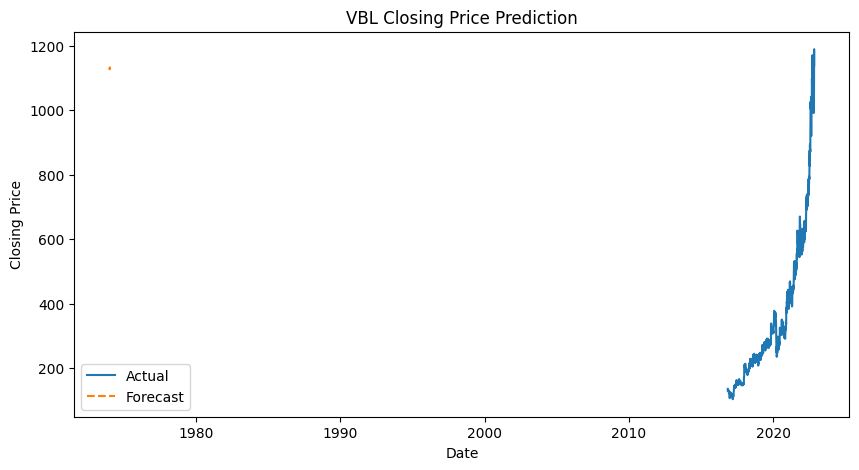

In [15]:
# Plot the actual data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title(f'{company} Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Stock Price Prediction (Time Series Forecasting)** Using ARIMA

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [24]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['close'].values.reshape(-1, 1))

In [25]:
# Create dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [26]:
# Split data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

In [27]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Train model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

1242/1242 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - loss: 9.8242e-04


In [31]:
# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [38]:
# Reshape Y_train and Y_test to be 2D arrays
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

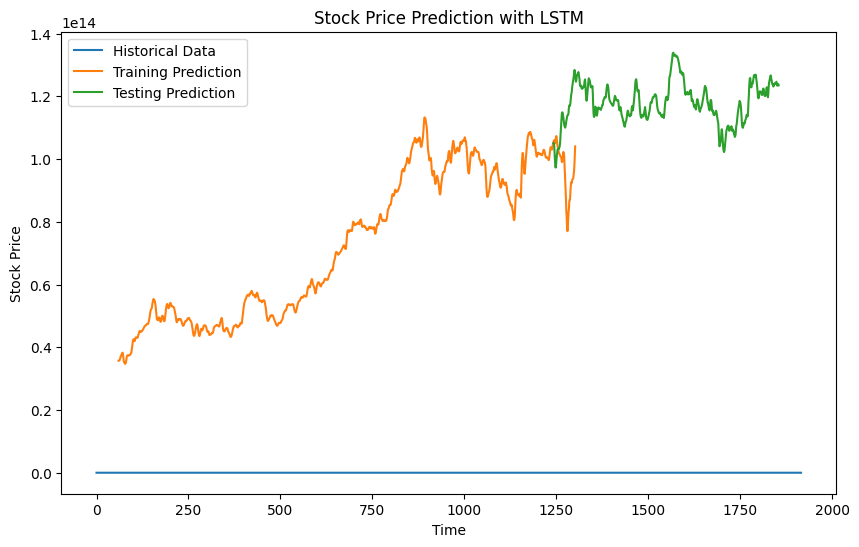

In [39]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label='Historical Data')
plt.plot(range(time_step, time_step + len(train_predict)), train_predict, label='Training Prediction')
plt.plot(range(len(X) - len(test_predict), len(X)), test_predict, label='Testing Prediction')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Trend Analysis** (Using Exponential Moving Average)

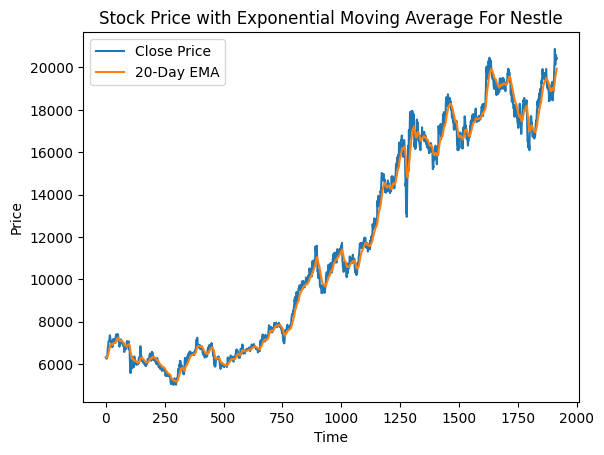

In [65]:
def plot_exponential_moving_average(stock_data, span):
    stock_data['EMA'] = stock_data['close'].ewm(span=span, adjust=False).mean()
    plt.plot(stock_data['close'], label='Close Price')
    plt.plot(stock_data['EMA'], label=f'{span}-Day EMA')
    plt.title('Stock Price with Exponential Moving Average For Nestle')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()    
    
    
# Load data (assuming 'data' is correctly loaded from the Excel file)
file_path = '/kaggle/input/all-company-data/FMCG IND.xlsx'
data = pd.read_excel(file_path, sheet_name='Nestle')

# Call the function to plot EMA
plot_exponential_moving_average(data, span=20)

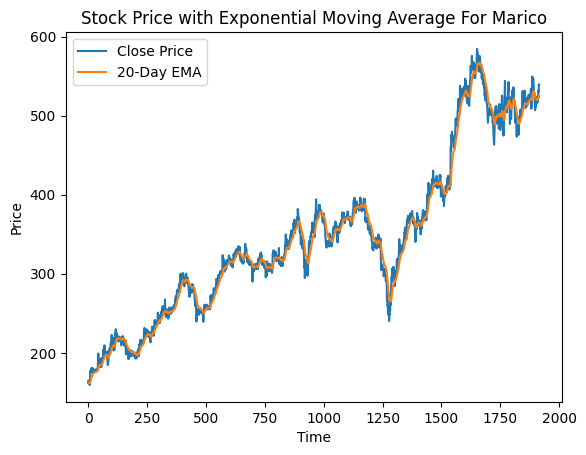

In [66]:
def plot_exponential_moving_average(stock_data, span):
    stock_data['EMA'] = stock_data['close'].ewm(span=span, adjust=False).mean()
    plt.plot(stock_data['close'], label='Close Price')
    plt.plot(stock_data['EMA'], label=f'{span}-Day EMA')
    plt.title('Stock Price with Exponential Moving Average For Marico')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()    
    
    
# Load data (assuming 'data' is correctly loaded from the Excel file)
file_path = '/kaggle/input/all-company-data/FMCG IND.xlsx'
data = pd.read_excel(file_path, sheet_name='Marico')

# Call the function to plot EMA
plot_exponential_moving_average(data, span=20)

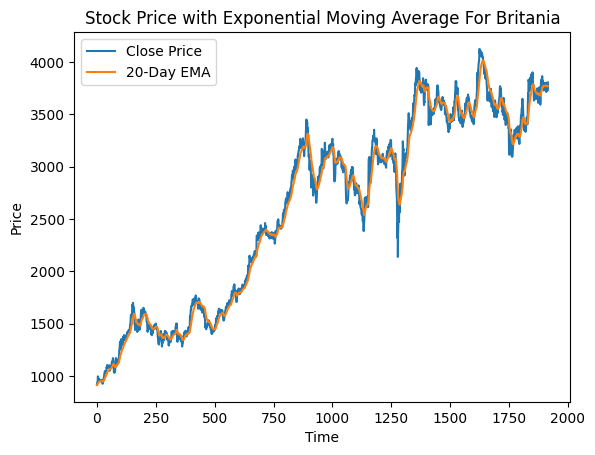

In [67]:
def plot_exponential_moving_average(stock_data, span):
    stock_data['EMA'] = stock_data['close'].ewm(span=span, adjust=False).mean()
    plt.plot(stock_data['close'], label='Close Price')
    plt.plot(stock_data['EMA'], label=f'{span}-Day EMA')
    plt.title('Stock Price with Exponential Moving Average For Britania')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()    
    
    
# Load data (assuming 'data' is correctly loaded from the Excel file)
file_path = '/kaggle/input/all-company-data/FMCG IND.xlsx'
data = pd.read_excel(file_path, sheet_name='Britania')

# Call the function to plot EMA
plot_exponential_moving_average(data, span=20)

**Volatility Prediction** (Using Historical Volatility)

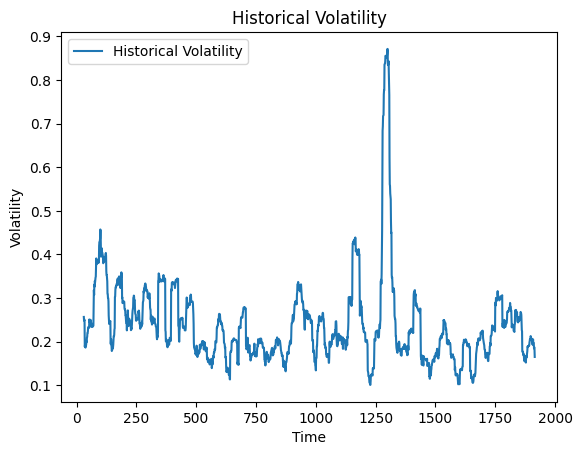

In [69]:
def calculate_historical_volatility(stock_data, window=30):
    log_returns = np.log(stock_data['close'] / stock_data['close'].shift(1))
    volatility = log_returns.rolling(window=window).std() * np.sqrt(252)  # Annualize the volatility
    stock_data['Volatility'] = volatility
    return stock_data

# Load data
data = pd.read_excel(file_path, sheet_name='Britania')
data = calculate_historical_volatility(data)

plt.plot(data['Volatility'], label='Historical Volatility')
plt.title('Historical Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

**Volume Prediction** (Using Linear Regression)

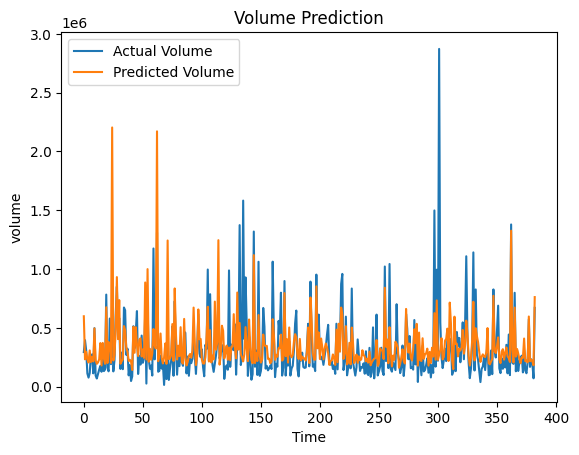

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def predict_volume(stock_data):
    stock_data['Lagged_Volume'] = stock_data['volume'].shift(1)
    stock_data = stock_data.dropna()
    
    X = stock_data[['Lagged_Volume']]
    y = stock_data['volume']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    volume_pred = model.predict(X_test)
    return volume_pred, y_test

# Load data
data = pd.read_excel(file_path, sheet_name='Britania')
volume_pred, y_test = predict_volume(data)

plt.plot(y_test.values, label='Actual Volume')
plt.plot(volume_pred, label='Predicted Volume')
plt.title('Volume Prediction')
plt.xlabel('Time')
plt.ylabel('volume')
plt.legend()
plt.show()

**Technical Indicator Analysis**  (Using MACD - Moving Average Convergence Divergence)

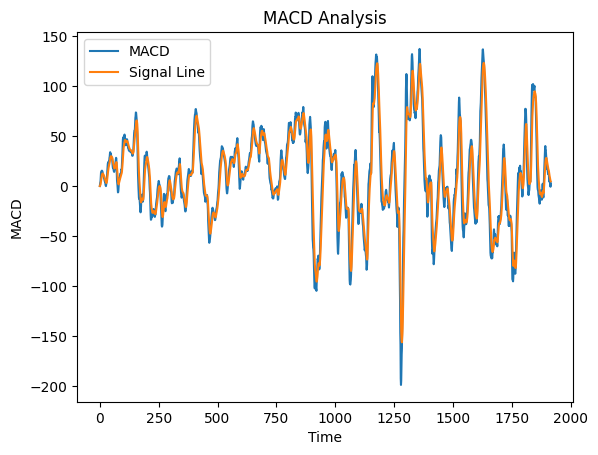

In [71]:
def calculate_macd(stock_data, short_window=12, long_window=26, signal_window=9):
    stock_data['EMA12'] = stock_data['close'].ewm(span=short_window, adjust=False).mean()
    stock_data['EMA26'] = stock_data['close'].ewm(span=long_window, adjust=False).mean()
    stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26']
    stock_data['Signal Line'] = stock_data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return stock_data

# Load data
data = pd.read_excel(file_path, sheet_name='Britania')
data = calculate_macd(data)

plt.plot(data['MACD'], label='MACD')
plt.plot(data['Signal Line'], label='Signal Line')
plt.title('MACD Analysis')
plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend()
plt.show()

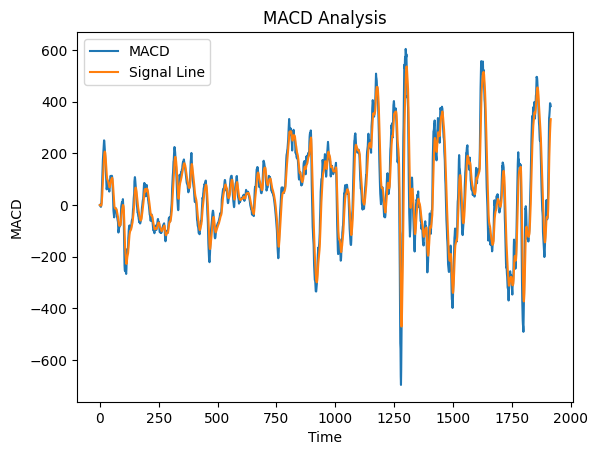

In [74]:
def calculate_macd(stock_data, short_window=12, long_window=26, signal_window=9):
    stock_data['EMA12'] = stock_data['close'].ewm(span=short_window, adjust=False).mean()
    stock_data['EMA26'] = stock_data['close'].ewm(span=long_window, adjust=False).mean()
    stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26']
    stock_data['Signal Line'] = stock_data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return stock_data

# Load data
data = pd.read_excel(file_path, sheet_name='Nestle')
data = calculate_macd(data)

plt.plot(data['MACD'], label='MACD')
plt.plot(data['Signal Line'], label='Signal Line')
plt.title('MACD Analysis')
plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend()
plt.show()

**Anomaly Detection** (Using IQR - Interquartile Range)

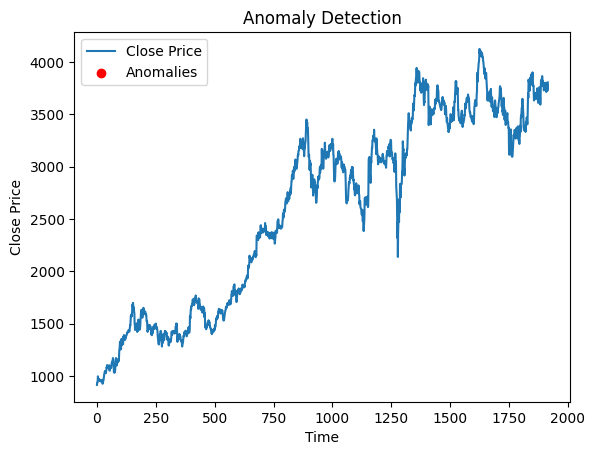

In [77]:
def detect_anomalies_iqr(stock_data):
    q1 = stock_data['close'].quantile(0.25)
    q3 = stock_data['close'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    anomalies = stock_data[(stock_data['close'] < lower_bound) | (stock_data['close'] > upper_bound)]
    return anomalies

# Load data
data = pd.read_excel(file_path, sheet_name='Britania')
anomalies = detect_anomalies_iqr(data)

plt.plot(data['close'], label='Close Price')
plt.scatter(anomalies.index, anomalies['close'], color='red', label='Anomalies')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

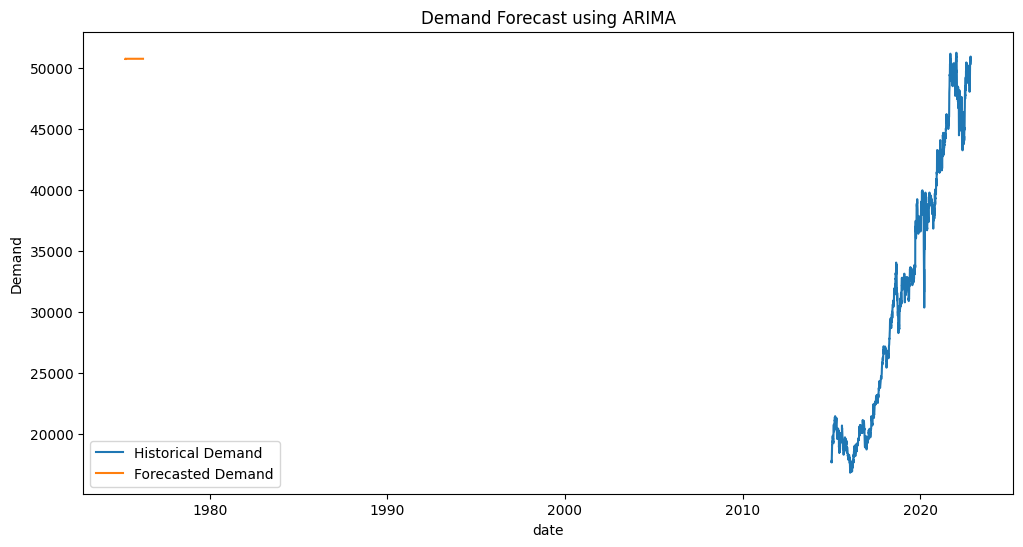

In [87]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load data from Excel file
file_path = '/kaggle/input/all-company-data/FMCG IND.xlsx'

# Example: Load data from multiple sheets into a single DataFrame
dfs = pd.read_excel('/kaggle/input/all-company-data/FMCG IND.xlsx', sheet_name=[
    "Britania", "COLPAL", "Dabur", "EMAMI", "GODREJ", "HINDULV",
    "ITC", "MCDOWELL", "Marico", "Nestle", "PGHH", "Radico",
    "TATA", "UBL", "VBL"
])

# Combine data from all sheets
combined_df = pd.concat(dfs, ignore_index=True)

# Assuming 'Date' and 'Close' columns exist in combined_df
# If 'Date' is not datetime, convert it to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Prepare data: Aggregate demand (e.g., sum of 'Close' prices) by date
demand_data = combined_df.groupby('date')['close'].sum().reset_index()

# Set 'Date' as index for time series analysis
demand_data.set_index('date', inplace=True)

# Fit ARIMA model
model = ARIMA(demand_data, order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Forecast future demand
forecast_steps = 365  # Forecasting for 365 days (adjust as needed)
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(demand_data, label='Historical Demand')
plt.plot(forecast, label='Forecasted Demand')
plt.title('Demand Forecast using ARIMA')
plt.xlabel('date')
plt.ylabel('Demand')
plt.legend()
plt.show()